Perform K-means clustering using following steps:

1. Choose any labelled dataset and remove its labels and keep only features in the dataset.
2. After removing labels, implement k-means clustering using standard libraries.
3. Try different k values in your k-means code and everytime plot the cluster distribution to see whether the clusters are making sense or not.
4. Comment on the homogeneity of your clusters.

In [56]:
import sys

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import sklearn

from sklearn.metrics.pairwise import euclidean_distances

# clustering libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# alternative scipy implementation for clustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# for scaling numpy array
from sklearn.preprocessing import StandardScaler

givenDec = lambda gdVal: float('%.1f' % gdVal) # 1 digit

In [76]:
def PrintDistMat(gDistMat):
    for i in range(len(gDistMat)):
        for j in range(len(gDistMat[0])):
            sys.stdout.write(str(givenDec(gDistMat[i][j])) + '\t')
        sys.stdout.write('\n')

In [57]:
my_data = pd.read_csv('/content/chip_dataset.csv')

In [58]:
my_data.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [59]:
# convert categorical data to numerical
my_data["Type"] = my_data["Type"].astype("category").cat.codes

In [60]:
my_data.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,0,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,0,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,0,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,0,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,0,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [61]:
#drop unused column
my_data = my_data.drop(['Unnamed: 0', 'Release Date', 'Foundry', 'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'], axis=1)

In [62]:
my_data.head()

,Product,Type,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz)
0,AMD Athlon 64 3500+,0,65.0,45.0,77.0,122.0,2200.0
1,AMD Athlon 200GE,0,14.0,35.0,192.0,4800.0,3200.0
2,Intel Core i5-1145G7,0,10.0,28.0,NaN,NaN,2600.0
3,Intel Xeon E5-2603 v2,0,22.0,80.0,160.0,1400.0,1800.0
4,AMD Phenom II X4 980 BE,0,45.0,125.0,258.0,758.0,3700.0


In [63]:
#set "Product" column to index
my_data.set_index('Product', inplace=True)

In [64]:
my_data.head()

,Type,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz)
Product,,,,,,
AMD Athlon 64 3500+,0,65.0,45.0,77.0,122.0,2200.0
AMD Athlon 200GE,0,14.0,35.0,192.0,4800.0,3200.0
Intel Core i5-1145G7,0,10.0,28.0,NaN,NaN,2600.0
Intel Xeon E5-2603 v2,0,22.0,80.0,160.0,1400.0,1800.0
AMD Phenom II X4 980 BE,0,45.0,125.0,258.0,758.0,3700.0


In [65]:
#replace nan
my_data = my_data.fillna(my_data.mean())

In [66]:
my_data.head()

,Type,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz)
Product,,,,,,
AMD Athlon 64 3500+,0,65.0,45.0,77.000000,122.000000,2200.0
AMD Athlon 200GE,0,14.0,35.0,192.000000,4800.000000,3200.0
Intel Core i5-1145G7,0,10.0,28.0,188.440445,1929.922279,2600.0
Intel Xeon E5-2603 v2,0,22.0,80.0,160.000000,1400.000000,1800.0
AMD Phenom II X4 980 BE,0,45.0,125.0,258.000000,758.000000,3700.0


In [80]:
mat = my_data.values # convert dataframe to matrix
mat

array([[0.00000000e+00, 6.50000000e+01, 4.50000000e+01, 7.70000000e+01,
        1.22000000e+02, 2.20000000e+03],
       [0.00000000e+00, 1.40000000e+01, 3.50000000e+01, 1.92000000e+02,
        4.80000000e+03, 3.20000000e+03],
       [0.00000000e+00, 1.00000000e+01, 2.80000000e+01, 1.88440445e+02,
        1.92992228e+03, 2.60000000e+03],
       ...,
       [1.00000000e+00, 4.00000000e+01, 2.30000000e+01, 1.00000000e+02,
        4.86000000e+02, 5.00000000e+02],
       [1.00000000e+00, 1.50000000e+02, 8.13599811e+01, 6.50000000e+01,
        2.90000000e+01, 2.50000000e+02],
       [1.00000000e+00, 6.50000000e+01, 8.13599811e+01, 8.60000000e+01,
        2.10000000e+02, 5.40000000e+02]])

In [81]:
km = sklearn.cluster.KMeans(n_clusters=4, init='random', n_init=1, verbose=0)
km.fit(mat)

KMeans(init='random', n_clusters=4, n_init=1)

In [94]:
# Get cluster assignment labels
labels = km.labels_
labels

array([3, 2, 3, ..., 1, 1, 1], dtype=int32)

In [96]:
# Format results as a DataFrame
results = pd.DataFrame([my_data.index,labels]).T
results.head()

,0,1
0,AMD Athlon 64 3500+,3
1,AMD Athlon 200GE,2
2,Intel Core i5-1145G7,3
3,Intel Xeon E5-2603 v2,3
4,AMD Phenom II X4 980 BE,3


In [97]:
# add cluster ids as another column
my_data["cluster"] = labels
my_data.head()

,Type,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),cluster
Product,,,,,,,
AMD Athlon 64 3500+,0,65.0,45.0,77.000000,122.000000,2200.0,3
AMD Athlon 200GE,0,14.0,35.0,192.000000,4800.000000,3200.0,2
Intel Core i5-1145G7,0,10.0,28.0,188.440445,1929.922279,2600.0,3
Intel Xeon E5-2603 v2,0,22.0,80.0,160.000000,1400.000000,1800.0,3
AMD Phenom II X4 980 BE,0,45.0,125.0,258.000000,758.000000,3700.0,3


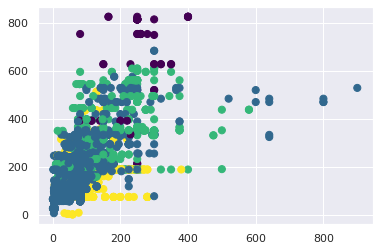

In [108]:
#TDP (W) & Die Size (mm^2)
plt.scatter(my_data["TDP (W)"], my_data["Die Size (mm^2)"], c=labels, s=50, cmap='viridis')

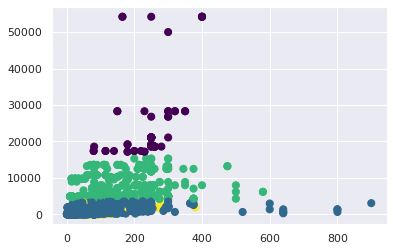

In [109]:
#TDP (W) & Transistors (million)
plt.scatter(my_data["TDP (W)"], my_data["Transistors (million)"], c=labels, s=50, cmap='viridis')

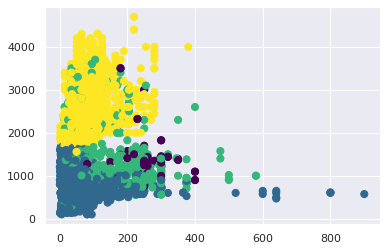

In [110]:
#TDP (W) & Freq (MHz)
plt.scatter(my_data["TDP (W)"], my_data["Freq (MHz)"], c=labels, s=50, cmap='viridis')

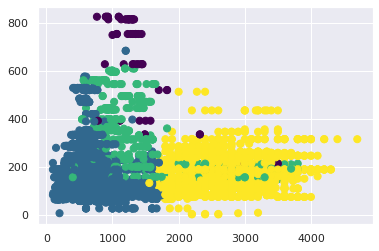

In [116]:
#Freq (MHz) & Die Size (mm^2)
plt.scatter(my_data["Freq (MHz)"], my_data["Die Size (mm^2)"], c=labels, s=50, cmap='viridis')